In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('4_clean.csv')

In [9]:
data2 = data[data['resolved'] == 0]
data2.to_csv('0_4_clean.csv', index=False)

Setting up auto-pay reduces the weighted average delinquency by 0.11 instances, which is a 54.27% decrease.


/var/folders/k7/skqszl5n2rgfd3d_jhqfz1w80000gn/T/ipykernel_57498/305466116.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=grouped_data.index,


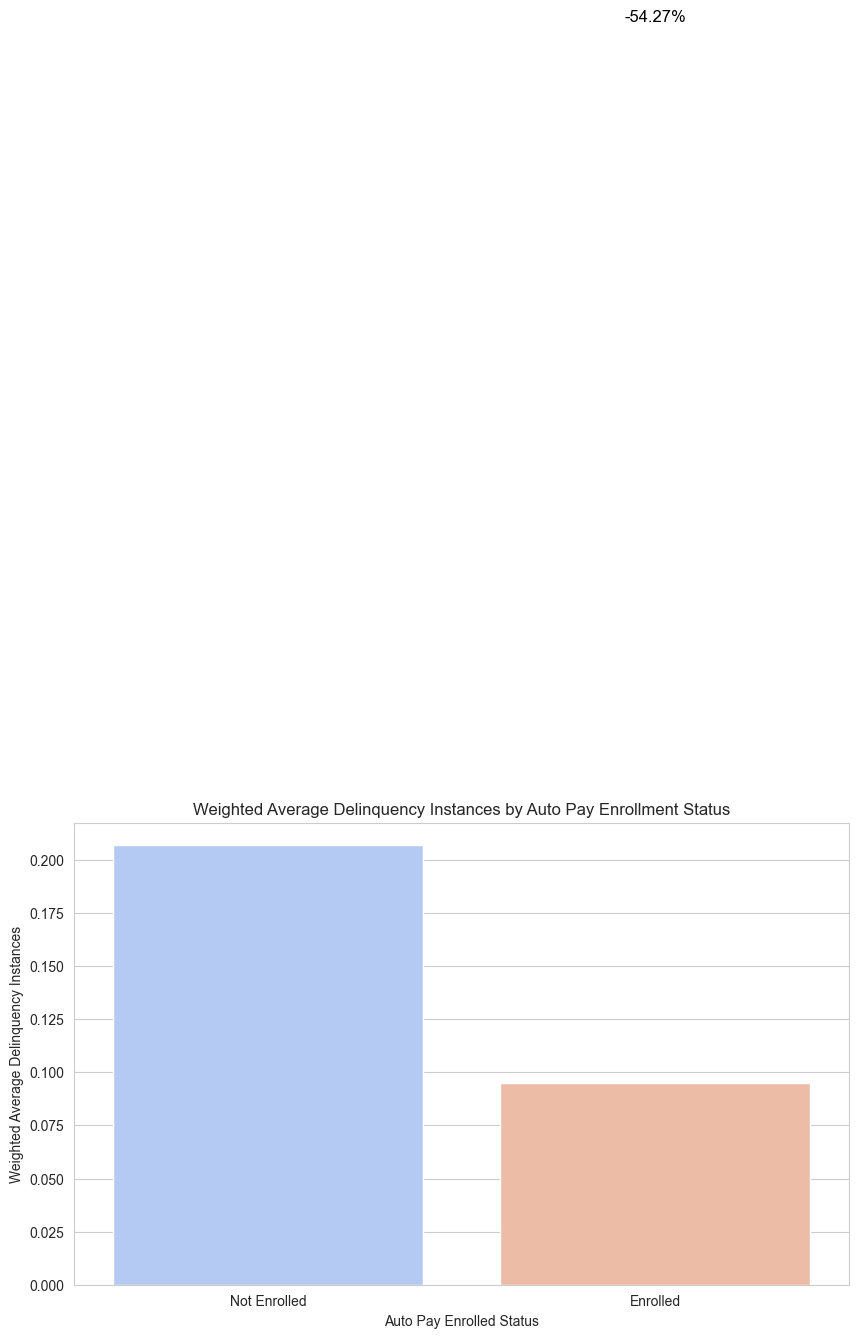

In [4]:


# 假设数据已经加载到 DataFrame 'data' 中
# data = pd.read_csv('your_dataset.csv')  # 加载数据

# 解析拖欠历史记录，考虑上一周期的权重
data['delinquency_weighted'] = data['delinquency_history_13_march'].apply(
    lambda x: int(str(x)[1]) * 2 + int(str(x)[0]
                                       ) if len(str(x)) == 2 else int(str(x)[0])
)

# 根据自动支付状态分组，并计算每组的加权平均拖欠笔数
grouped_data = data.groupby('auto_pay_enrolled_status_13_march')[
    'delinquency_weighted'].mean()

# 计算设置自动支付后平均拖欠减少的比例
if 0 in grouped_data and 1 in grouped_data:
    average_reduction = grouped_data[0] - grouped_data[1]
    reduction_percentage = (average_reduction / grouped_data[0]) * 100
else:
    average_reduction = 0
    reduction_percentage = 0

# 输出结果
print(
    f"Setting up auto-pay reduces the weighted average delinquency by {average_reduction:.2f} instances, which is a {reduction_percentage:.2f}% decrease.")

# 美化并绘制条形图
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bar_plot = sns.barplot(x=grouped_data.index,
                       y=grouped_data.values, palette='coolwarm')
plt.title('Weighted Average Delinquency Instances by Auto Pay Enrollment Status')
plt.xlabel('Auto Pay Enrolled Status')
plt.ylabel('Weighted Average Delinquency Instances')
plt.xticks(ticks=[0, 1], labels=['Not Enrolled', 'Enrolled'])

# 在图中标注减少比例
plt.text(1, grouped_data[1] + 0.5,
         f'-{reduction_percentage:.2f}%', fontsize=12, color='black', ha='center')

# 显示图表
plt.show()